# NUR Turorial 2

## 1 One - dimensionsal interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A

In [2]:
#A
class LinearInterpol(): 
    def __init__(self,x,y) -> None:
        self.x = np.array(x) 
        self.y= np.array(y)

    def find_closest_lowest_index(self, x) -> int:
        slicing_list = self.x 
        index_list = [index for index in range(0,len(self.x))]
        list_len= len(slicing_list)
        while list_len > 1: 
            middle_index = int(np.math.floor(list_len/2))
            #update condition
            if x > slicing_list[middle_index]:
                slicing_list = slicing_list[middle_index:]
                index_list = index_list[middle_index:]
            else: 
                slicing_list = slicing_list[:middle_index]
                index_list = index_list[:middle_index]
            list_len = len(slicing_list)
        return index_list[0]

    def interpolate(self, x) -> float:
        neighbours = self.find_closest_lowest_index(x)
        y_left = self.y[neighbours]
        y_right = self.y[neighbours+1]
        x_left =  self.x[neighbours]
        x_right = self.x[neighbours+1]
        dydx = (y_right-y_left) / (x_right-x_left)
        interpolated_value = y_left + dydx * (x-x_left)
        return interpolated_value


In [4]:
#create data and initiate linear interpol
x = np.linspace(0,2*np.pi, 12)
y = np.sin(x)
interpol = LinearInterpol(x,y)


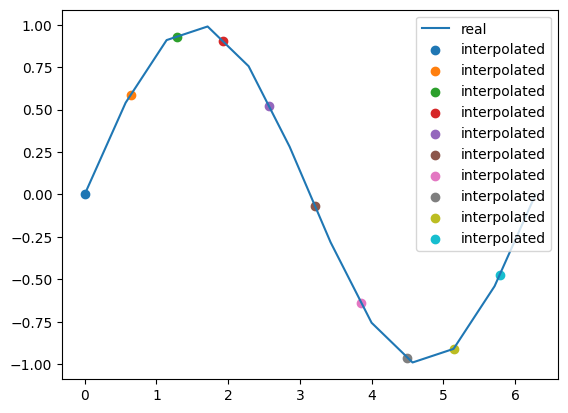

In [5]:
plt.plot(x,y, label="real")
for i in np.linspace(0,2*np.pi-0.5, 10):
    plt.scatter(i, interpol.interpolate(i), label="interpolated")

plt.legend()

## B

using nevilles algorithm calculate higher order interpolations


natural spline = $\quad S_1''(t_0)=S_n''(t_n)=0$

https://www.math.ntnu.no/emner/TMA4215/2008h/cubicsplines.pdf

In [23]:
print(len(list(range(5))))
print(list(range(5)))

5
[0, 1, 2, 3, 4]


In [3]:
def test_interpolate(xlow= -3, xhigh=3, steps=10, M=2, method="neville", equation = lambda a: a**3 ):
    x1 =  np.linspace(xlow,xhigh, steps)
    x2 =  np.linspace(xlow,xhigh, steps*3)  
    y =  equation(x1)
    interpolator = interpolate(x1,y)
    interpolated = [interpolator.interpolate(i,M=M, method=method) for i in x2]
    plt.scatter(x2, interpolated, label="interpolated")
    plt.scatter(x1,y, label="original")
    plt.legend()
    plt.grid()

class interpolate(): 
    def __init__(self,x,y) -> None:
        self.x = np.array(x) 
        self.y= np.array(y)

    def neville(self,x,neighbours) -> float:
        xvalues =self.x[neighbours]
        n = len(xvalues)
        
        #calculation
        pvals = self.y.copy()[neighbours]  
        for j in range(1, n):
            for i in range(n - j):
                pvals[i] = ((x - xvalues[i + j]) * pvals[i] + (xvalues[i] - x) * pvals[i + 1]) / (xvalues[i] - xvalues[i + j])
        return pvals[0]
    
    
    def CubicSpline(self,x,neighbours) -> float:
        
        xvals = self.x[neighbours]
        y = self.y[neighbours]
        
        n = len(xvals)
        h = [xvals[i+1] -xvals[i] for i in range(0,n-1)]
        
        b = [(1/h[i]) * (y[i+1] -y[i]) for i in range(0,n-1)]
        
        v = [2*(h[i-1] +h[i]) for i in range(1,n-1)]
        
        b = [6*(b[i] -b[i-1]) for i in range(1,n-1)]
        
        z = [0 for i in range(n)]
        
        #construct A matrix
        A = np.zeros((n-2,n-2))
        
        #filling A and b matrix
        np.fill_diagonal(A,v[:n-1])
        A = A + np.diag(h[:n-3],1)+ np.diag(h[:n-3],-1)
        b = b 
        
        zvals = np.linalg.solve(A,b)
        
        spline_values=[]
        for i in range(0,len(zvals)-1):
            spline_values.append((zvals[i+1]/(6*h[i])) (x-xvals[i])**3 + (z[i]/(6*h[i]))* (xvals[i+1]-x)**3 + ((y[i+1]/h[i])-(z[i+1]/6)* h[i])*(x-xvals[i]) + ((y[i]/h[i])-(h[i]/6 * zvals[i]))*(xvals[i+1]-x))
            
        return spline_values

        
    
    def neighbours(self, x, M) -> list:
        slicing_list = self.x 
        index_list = [index for index in range(0,len(self.x))]
        list_len= len(slicing_list)
        while list_len > 1: 
            middle_index = int(np.math.floor(list_len/2))
            #update condition
            if x > slicing_list[middle_index]:
                slicing_list = slicing_list[middle_index:]
                index_list = index_list[middle_index:]
            else: 
                slicing_list = slicing_list[:middle_index]
                index_list = index_list[:middle_index]
            list_len = len(slicing_list)
        finallist = list(range(int(np.ceil(index_list[0]-M/2)+1), int(np.floor(index_list[0]+M/2)+1)))
        if max(finallist) >= len(self.x):
            finallist = finallist - (max(finallist)-len(self.x))
            
        if min(finallist) < 0:
            finallist = finallist + min(finallist)
        
        
        return finallist
        
        
    def interpolate(self, x, M=1, method= "neville") -> float:
        #neville
        if method == "neville":
            neighbours = self.neighbours(x,M)
            try: 
                return self.neville(x, neighbours)
            except (IndexError, ValueError) as e:
                print("Overflow error happened")
                print(f"{e}, {e.__class__}")
        
        #cubic spline
        if method == "CubicSpline":
            neighbours = self.neighbours(x,4)
            return self.CubicSpline(x, neighbours)
        """
            except (IndexError, ValueError) as e:
                print("Overflow error happened")
                print(f"{e}, {e.__class__}")
        """

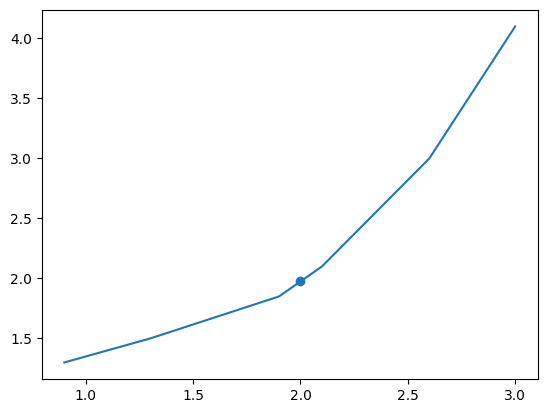

In [4]:
x = [0.9,1.3,1.9,2.1,2.6,3]
y = [1.3,1.5,1.85,2.1,3,4.1]
xtest = np.linspace(min(x), max(x), 20)
m = interpolate(x,y)
b = m.interpolate(2,M= 2, method="neville")
plt.plot(x,y)
plt.scatter(2, b)

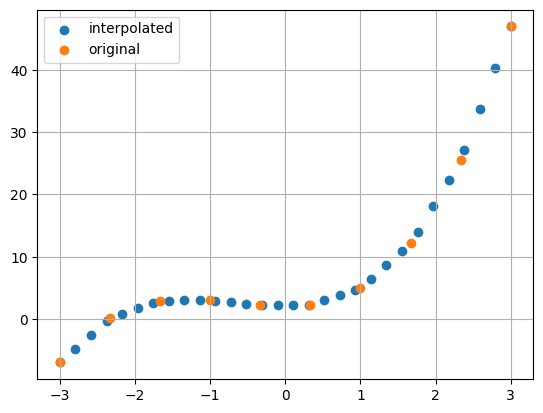

In [5]:
test_interpolate(M=3, equation=lambda a: a**3 +2* a**2+ 2, method="neville" )